In [18]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers.normalization import BatchNormalization
from keras.preprocessing import image
import numpy as np
from keras.models import load_model
import matplotlib.pyplot as plt

In [13]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   fill_mode='nearest')

valid_datagen = ImageDataGenerator(rescale=1./255)

batch_size = 30
base_dir = "D:/Tarun/PlantDataset"

training_set = train_datagen.flow_from_directory(base_dir+'/train',
                                                 target_size=(224, 224),
                                                 batch_size=batch_size,
                                                 class_mode='categorical')

valid_set = valid_datagen.flow_from_directory(base_dir+'/valid',
                                            target_size=(224, 224),
                                            batch_size=batch_size,
                                            class_mode='categorical')
class_dict = training_set.class_indices
disname = list(class_dict.keys())

Found 70295 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.


In [14]:
classifier = load_model("AlexNetModel.hdf5")

Prediction:


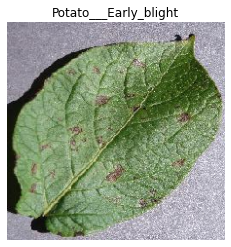

In [15]:
image_path = "D:/Tarun/PotatoEarlyBlight5.JPG"
new_img = image.load_img(image_path, target_size=(224, 224))
img = image.img_to_array(new_img)
img = np.expand_dims(img, axis=0)
img = img/255

print("Prediction:")
prediction = classifier.predict(img)

d = prediction.flatten()
j = d.max()
for index,item in enumerate(d):
    if item == j:
        class_name = disname[index]
       
plt.figure(figsize = (4,4))
plt.imshow(new_img)
plt.axis('off')
plt.title(class_name)
plt.show()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1_input (InputLayer)  [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 54, 54, 96)        34944     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 27, 27, 96)        0         
Total params: 34,944
Trainable params: 0
Non-trainable params: 34,944
_________________________________________________________________
<PIL.Image.Image image mode=RGB size=224x224 at 0x1B0AC53F880>


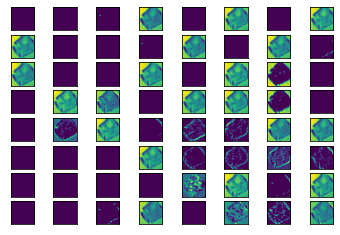

In [12]:
from keras.models import Model
from matplotlib import pyplot
model = load_model("AlexNetModel.hdf5")
model = Model(inputs=model.inputs, outputs=model.layers[1].output)
model.summary()
image_path = "D:/Tarun/PEB6.JPG"
new_img = image.load_img(image_path, target_size=(224, 224))
img = image.img_to_array(new_img)
print(new_img)
img = np.expand_dims(img, axis=0)
feature_maps = model.predict(img)
square = 8
for fmap in feature_maps:
	# plot all 64 maps in an 8x8 squares
	ix = 1
	for _ in range(square):
		for _ in range(square):
			# specify subplot and turn of axis
			ax = pyplot.subplot(square, square, ix)
			ax.set_xticks([])
			ax.set_yticks([])
			# plot filter channel in grayscale
			pyplot.imshow(fmap[:, :, ix-1], cmap='viridis')
			ix += 1
	# show the figure
	pyplot.show()

(1, 27, 27, 96)
(1, 27, 27, 96)
(1, 17, 17, 256)
(1, 8, 8, 256)
(1, 8, 8, 256)
(1, 6, 6, 384)


<ipython-input-11-67223b826fb9>:51: RuntimeWarning: invalid value encountered in true_divide
  x /= x.std ()
<ipython-input-11-67223b826fb9>:51: RuntimeWarning: divide by zero encountered in true_divide
  x /= x.std ()


(1, 6, 6, 384)
(1, 4, 4, 384)
(1, 4, 4, 384)
(1, 2, 2, 256)
(1, 1, 1, 256)
(1, 1, 1, 256)
(1, 256)
(1, 4096)
(1, 4096)
(1, 4096)
(1, 4096)
(1, 4096)
(1, 4096)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 38)


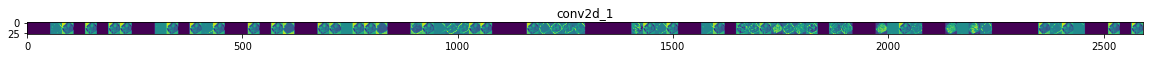

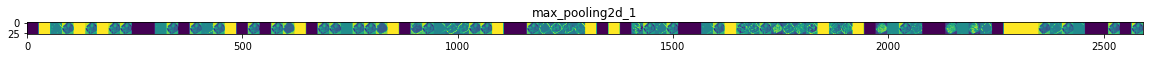

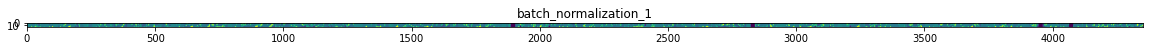

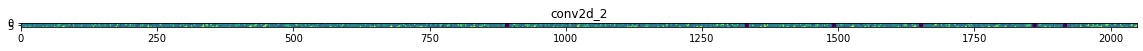

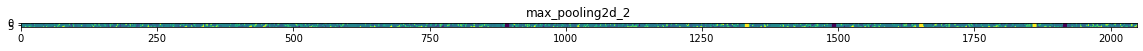

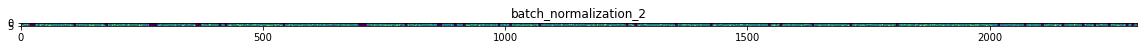

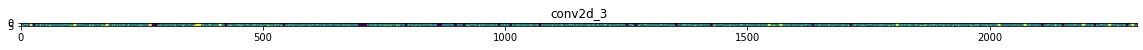

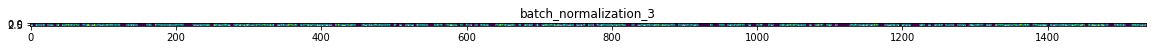

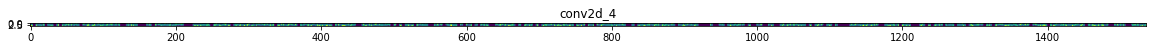

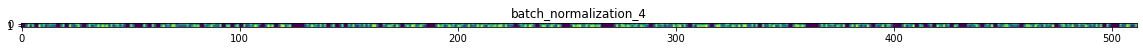

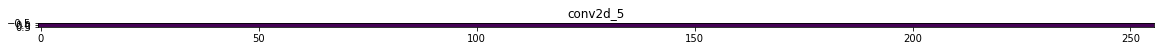

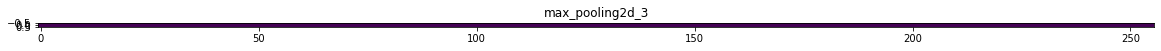

In [11]:
import tensorflow as tf
from keras.models import Model
from matplotlib import pyplot
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers.normalization import BatchNormalization
from keras.preprocessing import image
import numpy as np
from keras.models import load_model
import matplotlib.pyplot as plt
img_path="D:/Tarun/PEB6.JPG"
model = load_model("AlexNetModel.hdf5")
# Define a new Model, Input= image 
# Output= intermediate representations for all layers in the  
# previous model after the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)
#Load the input image
img = image.load_img(img_path, target_size=(224, 224))
# Convert ht image to Array of dimension (150,150,3)
x   = image.img_to_array(img)                           
x   = x.reshape((1,) + x.shape)
# Rescale by 1/255
x /= 255.0
# Let's run input image through our vislauization network
# to obtain all intermediate representations for the image.
successive_feature_maps = visualization_model.predict(x)
# Retrieve are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  print(feature_map.shape)
  if len(feature_map.shape) == 4:
    
    # Plot Feature maps for the conv / maxpool layers, not the fully-connected layers
   
    n_features = feature_map.shape[-1]  # number of features in the feature map
    size       = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)
    
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    
    # Postprocess the feature to be visually palatable
    for i in range(n_features):
      x  = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std ()
      x *=  64
      x += 128
      x  = np.clip(x, 0, 255).astype('uint8')
      # Tile each filter into a horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
# Display the grid
    scale = 20. / n_features
    plt.figure( figsize=(scale * n_features, scale) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( display_grid, aspect='auto', cmap='viridis' )